# Part 2 - Project Extension | Data Analysis - Crop Data

In this assignment you are to plan an extension to the analysis that you performed in Course Project - Part 1. The overall result of your extension plan is to help inform the city council, city manager/mayor, and city residents about the potential future impacts of smoke on their community. In Course Project - Part 1 you should have developed an initial prediction model for smoke. You should take that model and modify it to estimate a specific social or economic impact on the city.

For this part we have the data for both agriculture and the wildfire attributes for the city of Bismarck, North Dakota. Now, we will find a way to connect the two with a relationship that shows there is an impact of wildfire on the agricutural yield or produce. We will be going through a process of cleaning and subsetting data or pre-processing it to make it suitable for analysis.

Thus this notebook will contain the implementation of the following steps:

1. Preprocessing the raw data that has been collected for the agriculture in North Dakota.
2. After obtaining the final attributes for agriculture, we will use our final wildfire data to establish a relationship
3. We will use statistical methodologies to compare the relationship and prove it's significance

### Agriculture as an Economic Focus for North Dakota:

Agriculture is one of the main revenue generating industry in the state of North Dakota. Wildfire and Agriculture have direct impact on each other and agriculture is also directly responsible for the cash reciepts and the economic health of the state. Hence, by the transitive property we can claim that wildfire's effect on agriculture bears a weight on the econmony of the state.

The reason we are focusing more on Oats than any other crop is because it is concentrated and grown around the belt of the region where Bismarck lies. Hence there is a direct impact of oat on the economy of the city.

### Significance of Yield as an Economic Indicator:

- **Wealth Generation:** Higher yield signifies increased agricultural output, contributing significantly to a state's economic wealth through enhanced revenue from crop sales.

- **Cash Receipts and Income:** Improved yield translates to higher cash receipts from agricultural products, directly impacting the income of farmers and stakeholders.

- **Employment and Economic Activity:** Robust agricultural yield creates job opportunities and stimulates economic activities in related industries, bolstering the state's economy.

- **Market Competitiveness:** States with higher yield often have a competitive edge in regional or global markets, attracting investments and boosting trade activities.

- **Food Security and Stability:** Adequate yield ensures food security, stabilizes prices, and reduces dependence on external food sources, fostering economic stability.



## Setup
We first set the working dependencies and constants that are required to process.

The setup contains the following steps

Import all relevant packages
Define all the relevant constants that will be used throughout the script.

In [1]:
# import the packages
# Import the pandas library and alias it as pd
import pandas as pd

# Import the numpy library and alias it as np
import numpy as np

# Import the warnings library 
import warnings

# Ignore warnings for this demonstration
warnings.filterwarnings("ignore")

# Import the product library from itertools
from itertools import product

# import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# import Linear Regression tool
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Step 1 - Data Pre-Processing 

### Summary:
The code manipulates a dataset ('crop_data_NorthDakota.csv') using Pandas, performing various filtering and subsetting operations based on specific constraints related to survey data, time periods, geographical areas, and agricultural practices. It gradually refines the dataset to meet specific criteria for analysis.

### Steps:
- **Data Loading and Initial Exploration:**
  - Loads the dataset 'crop_data_NorthDakota.csv' into a DataFrame 'north_dakota_data'.
  - Displays the initial few rows and prints the original shape (rows, columns) of the dataset.
  
- **Duplicate Removal:**
  - Removes duplicate rows from 'north_dakota_data' and prints the updated shape.
  
- **Initial Subset Based on Constraints:**
  - Subsets the data based on constraints like survey data, time period (1963 to 2023), and a specific geographical area (Burleigh county).
  - Prints the shape of the subset data and saves it to a new CSV file named 'crop_data_NorthDakota_Burleigh.csv'.
  
- **Further Refinement Based on Agricultural Practices:**
  - Refines the subset data based on production practice, crop class, and utilization practices.
  - Filters out crops with less than 30 years of data and keeps only those with sufficient data.
  
- **Filtering Based on Unique Features:**
  - Filters crops based on having exactly five unique features.
  - Sorts the subset data based on the 'YEAR' column and checks for unique years present in the dataset.

The code gradually narrows down the dataset, filtering it based on specific criteria and constraints to prepare a refined dataset for further analysis.


### Drop Duplicates

In [3]:
# Reading the 'crop_data_NorthDakota.csv' file into the 'north_dakota_data' DataFrame
north_dakota_data = pd.read_csv(r"C:\Users\shwet\Documents\local-wildfire-project\Data512-WildFire-Project\02_data\02_intermediate_data\crop_data_NorthDakota.csv", index_col=0)

# Displaying the initial few rows of the DataFrame to view a sample of the data
north_dakota_data.head()

,SOURCE_DESC,SECTOR_DESC,GROUP_DESC,COMMODITY_DESC,CLASS_DESC,PRODN_PRACTICE_DESC,UTIL_PRACTICE_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,...,LOCATION_DESC,YEAR,FREQ_DESC,BEGIN_CODE,END_CODE,REFERENCE_PERIOD_DESC,WEEK_ENDING,LOAD_TIME,VALUE,CV_%
7,SURVEY,CROPS,FIELD CROPS,SUNFLOWER,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,SUNFLOWER - ACRES HARVESTED,...,"NORTH DAKOTA, CENTRAL, SHERIDAN",1984,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,"69,000",NaN
32,SURVEY,CROPS,FIELD CROPS,BARLEY,ALL CLASSES,ALL PRODUCTION PRACTICES,MALTING,PRICE RECEIVED,$ / BU,"BARLEY, MALTING - PRICE RECEIVED, MEASURED IN ...",...,NORTH DAKOTA,1986,MONTHLY,3,3,MAR,NaN,2012-01-01 00:00:00,1.88,NaN
94,SURVEY,CROPS,FIELD CROPS,WHEAT,"SPRING, (EXCL DURUM)",ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,"WHEAT, SPRING, (EXCL DURUM) - ACRES HARVESTED",...,"NORTH DAKOTA, NORTH CENTRAL, BOTTINEAU",1984,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,"70,000",NaN
102,SURVEY,CROPS,FIELD CROPS,WHEAT,"SPRING, DURUM",NON-IRRIGATED,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,"WHEAT, SPRING, DURUM, NON-IRRIGATED - ACRES HA...",...,"NORTH DAKOTA, WEST CENTRAL, MERCER",1995,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,"15,300",NaN
124,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,PRODUCTION,BU,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",...,"NORTH DAKOTA, CENTRAL, EDDY",2009,ANNUAL,0,0,YEAR,NaN,2015-06-03 15:08:31,"654,000",NaN


In [4]:
# Printing the number of rows and columns in the DataFrame
print(north_dakota_data.shape[0], len(north_dakota_data.columns))

# Removing duplicate rows from the DataFrame
north_dakota_data = north_dakota_data.drop_duplicates()

794272 39


In [5]:
# Printing the updated number of rows and columns after dropping duplicates
print(north_dakota_data.shape[0], len(north_dakota_data.columns))

# Displaying all column names to decide relevant columns for analysis
north_dakota_data.columns

794272 39


Index(['SOURCE_DESC', 'SECTOR_DESC', 'GROUP_DESC', 'COMMODITY_DESC',
       'CLASS_DESC', 'PRODN_PRACTICE_DESC', 'UTIL_PRACTICE_DESC',
       'STATISTICCAT_DESC', 'UNIT_DESC', 'SHORT_DESC', 'DOMAIN_DESC',
       'DOMAINCAT_DESC', 'AGG_LEVEL_DESC', 'STATE_ANSI', 'STATE_FIPS_CODE',
       'STATE_ALPHA', 'STATE_NAME', 'ASD_CODE', 'ASD_DESC', 'COUNTY_ANSI',
       'COUNTY_CODE', 'COUNTY_NAME', 'REGION_DESC', 'ZIP_5', 'WATERSHED_CODE',
       'WATERSHED_DESC', 'CONGR_DISTRICT_CODE', 'COUNTRY_CODE', 'COUNTRY_NAME',
       'LOCATION_DESC', 'YEAR', 'FREQ_DESC', 'BEGIN_CODE', 'END_CODE',
       'REFERENCE_PERIOD_DESC', 'WEEK_ENDING', 'LOAD_TIME', 'VALUE', 'CV_%'],
      dtype='object')

### Subsetting due to strict constraints 
Constraints include:
1. Data collection methodology - Survey Data
2. Time Period - 1963 to 2023
3. Geographical Constraints - Burleigh County (Since the data is at a County level we are going to limit the geography to Burleigh exists which Bismarck is a part.

In [6]:
# subsetting only survey data
nd_subset_data = north_dakota_data[north_dakota_data['SOURCE_DESC']== 'SURVEY']

# subsetting data for the analysis period
nd_subset_data = nd_subset_data[nd_subset_data['YEAR'].between(1963, 2023, inclusive='both')]

# subsetting data for the county of Burleigh - (Bismarck belongs to the Burleigh county )
nd_subset_data = nd_subset_data[nd_subset_data['COUNTY_NAME']== 'BURLEIGH']

# shape and size of the data after subsetting for the relevant records
print(nd_subset_data.shape[0], len(nd_subset_data.columns))

6412 39


In [8]:
# saving the data for intermediate use
sorted_data = nd_subset_data.sort_values(by=['YEAR', 'COMMODITY_DESC','SHORT_DESC'])
sorted_data.to_csv(r"C:\Users\shwet\Documents\local-wildfire-project\Data512-WildFire-Project\02_data\02_intermediate_data\crop_data_NorthDakota_Burleigh.csv")

In [9]:
# check for the agricultural practices
pd.DataFrame(nd_subset_data.groupby(['PRODN_PRACTICE_DESC','CLASS_DESC','UTIL_PRACTICE_DESC'])['COMMODITY_DESC'].nunique()).reset_index()

,PRODN_PRACTICE_DESC,CLASS_DESC,UTIL_PRACTICE_DESC,COMMODITY_DESC
0,ALL PRODUCTION PRACTICES,(EXCL ALFALFA),ALL UTILIZATION PRACTICES,1
1,ALL PRODUCTION PRACTICES,ALFALFA,ALL UTILIZATION PRACTICES,1
2,ALL PRODUCTION PRACTICES,ALL CLASSES,ALL UTILIZATION PRACTICES,13
3,ALL PRODUCTION PRACTICES,ALL CLASSES,FORAGE,1
4,ALL PRODUCTION PRACTICES,ALL CLASSES,GRAIN,1
5,ALL PRODUCTION PRACTICES,ALL CLASSES,SILAGE,1
6,ALL PRODUCTION PRACTICES,DRY EDIBLE,ALL UTILIZATION PRACTICES,1
7,ALL PRODUCTION PRACTICES,"DRY EDIBLE, (EXCL CHICKPEAS)",ALL UTILIZATION PRACTICES,1
8,ALL PRODUCTION PRACTICES,"DRY EDIBLE, INCL CHICKPEAS",ALL UTILIZATION PRACTICES,1
9,ALL PRODUCTION PRACTICES,NON-OIL TYPE,ALL UTILIZATION PRACTICES,1


### Subsetting due to Agricultural process
Constraints include:
1. Production Practice - All production process
2. Crop Class type - All crop classes
3. Utilization Practices - All Utilization Practices

In [10]:
# subsetting only all Production Practice
nd_subset_data = nd_subset_data[nd_subset_data['PRODN_PRACTICE_DESC'] == 'ALL PRODUCTION PRACTICES']

# # subsetting data for composite crop class
nd_subset_data = nd_subset_data[nd_subset_data['CLASS_DESC'] == 'ALL CLASSES']

# # subsetting data for composite utilization practices
nd_subset_data = nd_subset_data[nd_subset_data['UTIL_PRACTICE_DESC'] == 'ALL UTILIZATION PRACTICES']

# shape and size of the data after subsetting for the relevant records
print(nd_subset_data.shape[0], len(nd_subset_data.columns))

1640 39


In [11]:
# check for the crops that have data throughout the time frame
crops = pd.DataFrame(nd_subset_data.groupby(['COMMODITY_DESC'])['YEAR'].nunique()).reset_index()
# # filtering out crops that don't have more than 30 years of data
crops = crops[crops['YEAR']>30]
# getting crops which have data 
crops = list(crops['COMMODITY_DESC'].values)
crops

['BARLEY', 'CORN', 'FLAXSEED', 'HAY', 'OATS', 'RYE', 'WHEAT']

# Step 2 - Data Filtering

### Summary:
The provided code involves extensive data manipulation, filtering, statistical analysis, and merging of datasets. It aims to prepare a comprehensive dataset ('final_df') for detailed agricultural analysis. The process includes filtering crops based on specific criteria, handling missing data, conducting statistical operations, integrating external data, and formatting the dataset for analysis.

### Steps:

#### Data Filtering and Subsetting:
1. **Initial Crop Data Subsetting:**
   - Filters the dataset to subset data for specific crops previously filtered.
   - Prints the shape of the subsetted dataset after applying the filters.

2. **Feature-Based Crop Filtering:**
   - Conducts detailed filtering based on relevant features of the crops.
   - Subsets data for crops meeting the specified feature criteria.
   - Prints the shape of the dataset after this feature-based filtering.

3. **Data Sorting and Column Subsetting:**
   - Sorts the subsetted data based on the 'YEAR' column for chronological alignment.
   - Displays a sample (head) of the subsetted data for a quick overview.
   - Subsets relevant columns essential for the upcoming analysis.
   
4. **Data Format Transformation:**
    - Converting Data from Long to Wide Format : When dealing with datasets in Python using pandas, there are scenarios where transforming data from long to wide format becomes necessary. 
    - This transformation restructures the DataFrame by utilizing unique values from one column to create new columns.
    - The `pivot` function reshapes the DataFrame by specifying an index, columns, and values to create a new DataFrame.

5. **Numeric Data Processing:**
   - Converts specific columns to a numeric format for consistent analysis.
   - Handles missing values by filling them with the mean of respective groups.

#### Statistical Operations and Analysis:
6. **Identifying Crops with Highest Yield:**
   - Calculates the average yield for each crop over time.
   - Identifies and displays the crop with the highest average year-on-year yield.

7. **Data Manipulation for Specific Crop Analysis:**
   - Creates a template DataFrame encompassing all combinations of 'YEAR' and 'COMMODITY_DESC'.
   - Merges this template with the agricultural data to ensure a comprehensive dataset.
   - Imputes missing values through group-wise means for enhanced dataset completeness.
   - Converts data from wide format to long format for easier analysis.

8. **Incorporating Wildfire Smoke Estimates:**
   - Reads and processes an additional dataset related to wildfire smoke estimates.
   - Aggregates the smoke estimates based on 'Fire_Year' to gain insights into smoke occurrences.
   - Renames columns and merges this smoke estimate data with the agricultural dataset based on the 'YEAR' column.

#### Final Data Preparation:
9. **Final Dataset Assembly:**
   - Selects specific columns from the merged dataset ('final_df') to focus on pertinent factors for analysis.

In [12]:
# subsetting data for the crops filtered above
nd_subset_data = nd_subset_data[nd_subset_data['COMMODITY_DESC'].isin(crops)]
# shape and size of the data after subsetting for the relevant records
print(nd_subset_data.shape[0], len(nd_subset_data.columns))

1329 39


In [13]:
# check for the crops that have data with relevant features
crops = pd.DataFrame(nd_subset_data.groupby(['COMMODITY_DESC'])['STATISTICCAT_DESC'].nunique()).reset_index()
# filtering out crops that don't have 5 features
crops = crops[crops['STATISTICCAT_DESC']==5]
# getting crops which have data 
crops = list(crops['COMMODITY_DESC'].values)
crops

['BARLEY', 'FLAXSEED', 'OATS', 'WHEAT']

In [14]:
# subsetting data for the crops filtered above
nd_subset_data = nd_subset_data[nd_subset_data['COMMODITY_DESC'].isin(crops)]
# shape and size of the data after subsetting for the relevant records
print(nd_subset_data.shape[0], len(nd_subset_data.columns))

970 39


In [15]:
# sorting data
nd_subset_data = nd_subset_data.sort_values(by=['YEAR'])

In [16]:
# checking the time
nd_subset_data.YEAR.unique()

array([1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2020, 2021, 2022], dtype=int64)

In [17]:
# sample
nd_subset_data.head(5)

,SOURCE_DESC,SECTOR_DESC,GROUP_DESC,COMMODITY_DESC,CLASS_DESC,PRODN_PRACTICE_DESC,UTIL_PRACTICE_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,...,LOCATION_DESC,YEAR,FREQ_DESC,BEGIN_CODE,END_CODE,REFERENCE_PERIOD_DESC,WEEK_ENDING,LOAD_TIME,VALUE,CV_%
10373486,SURVEY,CROPS,FIELD CROPS,OATS,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,OATS - ACRES HARVESTED,...,"NORTH DAKOTA, SOUTH CENTRAL, BURLEIGH",1963,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,"41,000",NaN
11819999,SURVEY,CROPS,FIELD CROPS,WHEAT,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA HARVESTED,ACRES,WHEAT - ACRES HARVESTED,...,"NORTH DAKOTA, SOUTH CENTRAL, BURLEIGH",1963,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,"68,000",NaN
1999651,SURVEY,CROPS,FIELD CROPS,OATS,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA PLANTED,ACRES,OATS - ACRES PLANTED,...,"NORTH DAKOTA, SOUTH CENTRAL, BURLEIGH",1963,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,"49,000",NaN
3571888,SURVEY,CROPS,FIELD CROPS,FLAXSEED,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,PRODUCTION,BU,"FLAXSEED - PRODUCTION, MEASURED IN BU",...,"NORTH DAKOTA, SOUTH CENTRAL, BURLEIGH",1963,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,"299,000",NaN
15577014,SURVEY,CROPS,FIELD CROPS,FLAXSEED,ALL CLASSES,ALL PRODUCTION PRACTICES,ALL UTILIZATION PRACTICES,AREA PLANTED,ACRES,FLAXSEED - ACRES PLANTED,...,"NORTH DAKOTA, SOUTH CENTRAL, BURLEIGH",1963,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,"52,000",NaN


In [18]:
# subsetting relevant columns for the analysis
subset_cols = ['COMMODITY_DESC','STATISTICCAT_DESC', 'UNIT_DESC', 
               'SHORT_DESC','YEAR', 'VALUE']
nd_subset_data = nd_subset_data[subset_cols]

In [19]:
# sample
nd_subset_data.head()

,COMMODITY_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,YEAR,VALUE
10373486,OATS,AREA HARVESTED,ACRES,OATS - ACRES HARVESTED,1963,"41,000"
11819999,WHEAT,AREA HARVESTED,ACRES,WHEAT - ACRES HARVESTED,1963,"68,000"
1999651,OATS,AREA PLANTED,ACRES,OATS - ACRES PLANTED,1963,"49,000"
3571888,FLAXSEED,PRODUCTION,BU,"FLAXSEED - PRODUCTION, MEASURED IN BU",1963,"299,000"
15577014,FLAXSEED,AREA PLANTED,ACRES,FLAXSEED - ACRES PLANTED,1963,"52,000"


In [20]:
# shape and size of the data after subsetting
print(nd_subset_data.shape[0], len(nd_subset_data.columns))

970 6


In [21]:
# Sorting data
data = nd_subset_data.sort_values(by=['YEAR', 'COMMODITY_DESC', 'STATISTICCAT_DESC'])

# Selecting specific columns
data = data[['COMMODITY_DESC', 'YEAR', 'STATISTICCAT_DESC', 'VALUE']]

# Displaying a sample (head) of the data
data.head()

# Converting 'VALUE' column to numeric, handling commas
data['VALUE'] = pd.to_numeric(data['VALUE'].str.replace(',', ''), errors='coerce')

# Calculating mean of 'VALUE' based on grouping by multiple columns
data = pd.DataFrame(data.groupby(['COMMODITY_DESC', 'YEAR', 'STATISTICCAT_DESC'])['VALUE'].mean()).reset_index()

# Converting data from long format to wide format using pivot
df_wide = data.pivot(index=['COMMODITY_DESC', 'YEAR'], columns='STATISTICCAT_DESC', values='VALUE').reset_index()
df_wide

# Displaying the columns in the wide format DataFrame
df_wide.columns

# Creating a DataFrame with specific columns from the wide format data
crop_data = df_wide[['COMMODITY_DESC', 'YEAR', 'AREA HARVESTED', 'AREA PLANTED', 'PRODUCTION', 'YIELD']]

# Grouping by 'COMMODITY_DESC' and calculating size
crop_data.groupby('COMMODITY_DESC').size()

# Checking the number of unique years for each crop
crop_data.groupby('COMMODITY_DESC')['YEAR'].nunique()

# Checking for null values in the DataFrame
crop_data.isnull().any()

# Checking data types of columns in the DataFrame
crop_data.dtypes

# Converting numeric columns to float
numeric_columns = ['AREA HARVESTED', 'AREA PLANTED', 'PRODUCTION', 'YIELD']

# Filling null values with group-wise mean
filled_df = crop_data.copy()
for col in numeric_columns:
    filled_df[col] = crop_data.groupby(['COMMODITY_DESC', 'YEAR'])[col].transform(lambda x: x.fillna(x.mean()))
filled_df.isnull().any()

# Resetting index of the DataFrame
filled_df.reset_index(drop=True, inplace=True)

# Displaying a sample (head) of the filled DataFrame
filled_df.head()


STATISTICCAT_DESC,COMMODITY_DESC,YEAR,AREA HARVESTED,AREA PLANTED,PRODUCTION,YIELD
0,BARLEY,1963,47000.0,52000.0,940000.0,20.0
1,BARLEY,1964,33000.0,34000.0,957000.0,29.0
2,BARLEY,1965,30000.0,31000.0,1020000.0,34.0
3,BARLEY,1966,33000.0,33500.0,891000.0,27.0
4,BARLEY,1967,25000.0,26000.0,400000.0,16.0


In [22]:
# Filter for the crop with the highest average year-on-year yield

# Calculate average yield for each crop
avg_yield_per_crop = filled_df.groupby('COMMODITY_DESC')['YIELD'].mean()

# Find crop with the highest average year-on-year yield
crop_highest_yield = avg_yield_per_crop.idxmax()  # Identify crop with the highest average yield
highest_yield_value = avg_yield_per_crop.max()  # Retrieve the highest average yield value

# Display the crop with the highest average yield and its corresponding value
print(f"Crop with the highest average yield: {crop_highest_yield}")
print(f"Highest average yield value: {highest_yield_value}")


Crop with the highest average yield: OATS
Highest average yield value: 44.30480769230769


In [23]:
# filter only for oats
agri_data = filled_df[filled_df['COMMODITY_DESC']=='OATS']

In [24]:
# Create a template DataFrame with all combinations of 'YEAR' and 'COMMODITY_DESC'
all_years = list(range(1963,2023))  # All unique years from the original DataFrame
all_commodities = ['OATS'] # All unique commodities
template_df = pd.DataFrame(list(product(all_years, all_commodities)), columns=['YEAR', 'COMMODITY_DESC'])

# Merge the template DataFrame with the original DataFrame
merged_df = pd.merge(template_df, agri_data, on=['YEAR', 'COMMODITY_DESC'], how='left')

# Impute missing values with group-wise means
merged_df[numeric_columns] = merged_df.groupby(['COMMODITY_DESC'])[numeric_columns].transform(lambda x: x.fillna(x.mean()))

merged_df


,YEAR,COMMODITY_DESC,AREA HARVESTED,AREA PLANTED,PRODUCTION,YIELD
0,1963,OATS,41000.000000,49000.000000,1.148000e+06,28.000000
1,1964,OATS,52500.000000,53500.000000,2.257500e+06,43.000000
2,1965,OATS,53000.000000,54000.000000,2.544000e+06,48.000000
3,1966,OATS,50000.000000,53000.000000,1.850000e+06,37.000000
4,1967,OATS,41000.000000,53000.000000,8.610000e+05,21.000000
5,1968,OATS,65000.000000,68000.000000,2.925000e+06,45.000000
6,1969,OATS,61000.000000,65000.000000,3.050000e+06,50.000000
7,1970,OATS,57000.000000,64000.000000,1.767000e+06,31.000000
8,1971,OATS,51000.000000,56000.000000,2.499000e+06,49.000000
9,1972,OATS,48000.000000,56000.000000,2.160000e+06,41.800000


# Step 3 - Wildfire Feature Selection

### Summary:
The process of selecting wildfire features involved analyzing various attributes to capture essential information. Utilizing correlation analysis and data aggregation facilitated the identification of key features, ultimately leading to the choice of 'smoke estimate' as a representative metric for wildfire impact in comparison to crop data.

### Points:

1. **Identifying Varied Wildfire Attributes:**
   - Aimed to select attributes capturing maximum variance and information.
   - Sought a feature representing other factors comprehensively.

2. **Dataset Acquisition and Initial Analysis:**
   - Utilized 'final_yearly_wildfire_data_w_smokeestimate_aqi.csv' for wildfire feature exploration.
   - Conducted a correlation heatmap analysis showcasing relationships among features.

3. **Correlation Heatmap Analysis:**
   - Displayed correlation coefficients between features.
   - Relationships observed: 
     - Strong positive correlation between 'smoke_estimate' and 'AQI'.
     - Other features showed positive correlation except 'shortest_dist' (negatively correlated).

4. **Refining Feature Selection:**
   - Noted that 'smoke_estimate' encapsulates information from other factors.
   - Strong positive correlation between 'AQI' and 'smoke_estimate' led to excluding other attributes.

5. **Decision on Feature Selection:**
   - Opted to move forward with 'smoke_estimate' as a proxy for assessing wildfire impact.
   
6. **Addition of Essential Feature:**
   - Realized the absence of 'number of wildfires' as a crucial feature.
   - Added this feature by integrating data from 'wildfire_smoke_estimates.csv'.

7. **Data Aggregation for Final Selection:**
   - Aggregated data over the year:
     - Counted the number of fires.
     - Calculated the mean of smoke estimate.

### Relationships Observed in the Correlation Heatmap:

1. **Strong Positive Correlation:**
   - 'smoke_estimate' and 'AQI' exhibit a robust positive correlation, suggesting a significant association between smoke estimation and air quality.
   - 'smoke_estimate' portrays a notable positive correlation with other features like 'year', 'GIS_Acres', 'Shape_Area', 'fire_intensity', and 'scaled_overlap_component'.

2. **Negative Correlation:**
   - 'shortest_dist' stands out with a negative correlation concerning other attributes, indicating an inverse relationship. This might imply that shorter distances relate to more intense wildfire impact.

3. **Highly Correlated Features:**
   - 'GIS_Acres' and 'Shape_Area' showcase a perfect positive correlation, indicating redundancy. This suggests that they might represent similar information and could potentially be collinear in models.

4. **Relative Feature Importance:**
   - 'fire_intensity' demonstrates a strong positive correlation with several attributes, implying its significance in understanding wildfire intensity.

5. **Consolidated Feature Choice:**
   - 'smoke_estimate' displays strong positive correlations with multiple attributes, suggesting its comprehensive representation of varied wildfire features

In [25]:
# ingest wildfire data
wildfire_data = pd.read_csv(r"C:\Users\shwet\Documents\local-wildfire-project\Data512-WildFire-Project\02_data\03_final_data\final_yearly_wildfire_data_w_smokeestimate_aqi.csv", index_col = 0)

In [26]:
# Calculate the correlation matrix
correlation_matrix = wildfire_data.corr()
correlation_matrix

,year,GIS_Acres,Shape_Area,shortest_dist,fire_intensity,scaled_overlap_component,smoke_estimate,aqi
year,1.000000,0.601308,0.601308,-0.710506,0.586194,0.546951,0.814035,0.828658
GIS_Acres,0.601308,1.000000,1.000000,-0.731864,0.996362,0.388240,0.685527,0.570812
Shape_Area,0.601308,1.000000,1.000000,-0.731864,0.996362,0.388240,0.685527,0.570812
shortest_dist,-0.710506,-0.731864,-0.731864,1.000000,-0.743897,-0.500110,-0.666766,-0.670889
fire_intensity,0.586194,0.996362,0.996362,-0.743897,1.000000,0.371220,0.662116,0.563152
scaled_overlap_component,0.546951,0.388240,0.388240,-0.500110,0.371220,1.000000,0.495363,0.539810
smoke_estimate,0.814035,0.685527,0.685527,-0.666766,0.662116,0.495363,1.000000,0.694037
aqi,0.828658,0.570812,0.570812,-0.670889,0.563152,0.539810,0.694037,1.000000


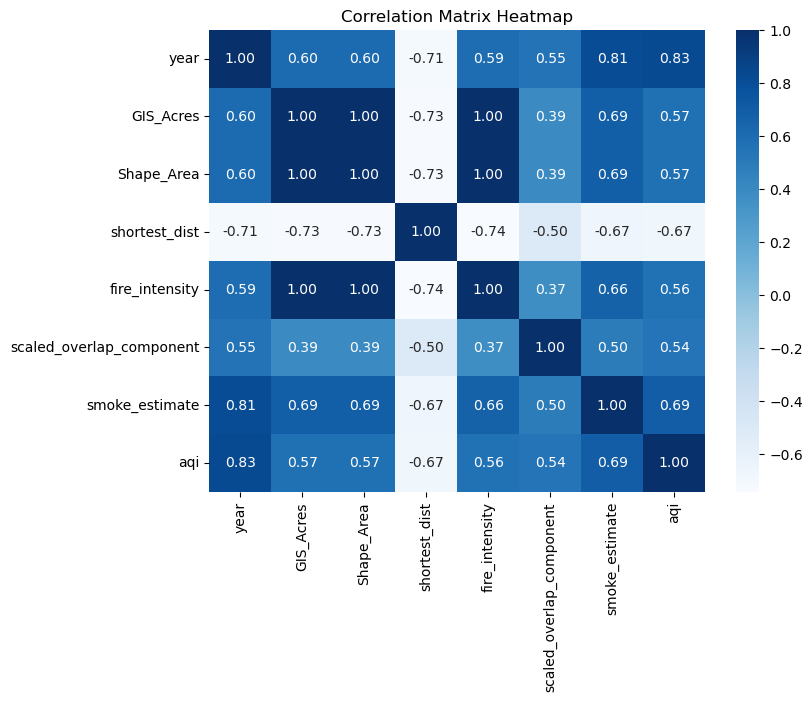

In [27]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()


### Feature Selection

In [28]:
# read the wildfire
wf = pd.read_csv(r"C:\Users\shwet\Documents\local-wildfire-project\Data512-WildFire-Project\02_data\02_intermediate_data\wildfire_smoke_estimates.csv", index_col = 0)

In [29]:
# Grouping by 'Fire_Year' and applying different aggregations to different columns
smoke_estimates = pd.DataFrame(wf.groupby('Fire_Year').agg({'OBJECTID': 'nunique', 'smoke_estimate': 'mean'})).reset_index()
smoke_estimates.rename(columns={'Fire_Year':'YEAR','OBJECTID': 'num_fires'}, inplace=True)
smoke_estimates.head()

,YEAR,num_fires,smoke_estimate
0,1963,344,7.409755
1,1964,353,9.473445
2,1965,313,6.415212
3,1966,379,8.631456
4,1967,404,6.593157


In [30]:
# Merge the DataFrames on the 'year' column
final_df = pd.merge(merged_df, smoke_estimates, on='YEAR', how='inner') 

In [32]:
# Displaying the columns in the 'final_df' DataFrame
final_df.columns

# Selecting specific columns in 'final_df' for analysis
final_df = final_df[['YEAR', 'COMMODITY_DESC', 'AREA HARVESTED', 'AREA PLANTED',
                     'smoke_estimate', 'num_fires', 'PRODUCTION', 'YIELD']]

# Displaying a sample (head) of the updated 'final_df'
final_df.head()

,YEAR,COMMODITY_DESC,AREA HARVESTED,AREA PLANTED,smoke_estimate,num_fires,PRODUCTION,YIELD
0,1963,OATS,41000.0,49000.0,7.409755,344,1148000.0,28.0
1,1964,OATS,52500.0,53500.0,9.473445,353,2257500.0,43.0
2,1965,OATS,53000.0,54000.0,6.415212,313,2544000.0,48.0
3,1966,OATS,50000.0,53000.0,8.631456,379,1850000.0,37.0
4,1967,OATS,41000.0,53000.0,6.593157,404,861000.0,21.0


In [31]:
# Displaying the columns in the updated 'final_df' after column selection
final_df.columns

Index(['YEAR', 'COMMODITY_DESC', 'AREA HARVESTED', 'AREA PLANTED',
       'smoke_estimate', 'num_fires', 'PRODUCTION', 'YIELD'],
      dtype='object')

### Hypothesiss Test

**Null Hypothesis (H₀):** There is no significant impact of wildfires on agricultural yield (economic indicator).

**Alternate Hypothesis (H₁):** Wildfires have a significant impact on agricultural yield, affecting the economic indicator.

### Requirements to Reject the Null Hypothesis:

**Statistical Significance:** We require statistical evidence suggesting a strong relationship between wildfires and agricultural yield. This evidence should have a low p-value (typically less than 0.05) to support the alternate hypothesis.

# Step 4 - Establish Correlation

### Purpose:
Generating a correlation matrix and heatmap to visualize relationships between specific attributes related to wildfire impact and crop data.

### Actions:

1. **Defining Attributes for Analysis:**
   - Selecting specific attributes ('AREA HARVESTED', 'AREA PLANTED', 'smoke_estimate', 'num_fires', 'PRODUCTION', 'YIELD') from the 'final_df' DataFrame.

2. **Calculation of Correlation Matrix:**
   - Applying the `corr()` function to the selected attributes to compute correlation coefficients.
   - Generating a matrix displaying pairwise correlations between these attributes.

3. **Visualization via Heatmap:**
   - Creating a heatmap using Matplotlib (`plt.figure()`) and Seaborn (`sns.heatmap()`).
   - Annotating the heatmap to depict correlation coefficients within each cell.
   - Utilizing a color gradient ('Blues') to represent varying degrees of correlation:
     - Darker shades denote stronger positive or negative correlations.
     - Lighter shades indicate weaker or negligible correlations.

### Purpose and Benefits:

- **Insight into Attribute Relationships:**
  - Visual representation aids in understanding correlations between wildfire-related attributes and crop data.
  - Quick identification of significant positive, negative, or negligible associations among selected features.
- **Informing Data-Driven Decisions:**
  - Enables informed decision-making in subsequent analysis by highlighting attribute interdependencies.
- **Enhanced Data Interpretation:**
  - Facilitates easier interpretation of complex relationships, supporting data-driven insights and analysis.


In [33]:
# Calculate the correlation matrix
correlation_matrix = final_df[['AREA HARVESTED', 'AREA PLANTED', 
                               'smoke_estimate', 'num_fires','PRODUCTION', 'YIELD']].corr()

correlation_matrix

,AREA HARVESTED,AREA PLANTED,smoke_estimate,num_fires,PRODUCTION,YIELD
AREA HARVESTED,1.000000,0.916445,-0.604496,-0.634762,0.918815,-0.205217
AREA PLANTED,0.916445,1.000000,-0.645162,-0.701385,0.783273,-0.479177
smoke_estimate,-0.604496,-0.645162,1.000000,0.749682,-0.497502,0.275258
num_fires,-0.634762,-0.701385,0.749682,1.000000,-0.554203,0.363924
PRODUCTION,0.918815,0.783273,-0.497502,-0.554203,1.000000,0.069031
YIELD,-0.205217,-0.479177,0.275258,0.363924,0.069031,1.000000


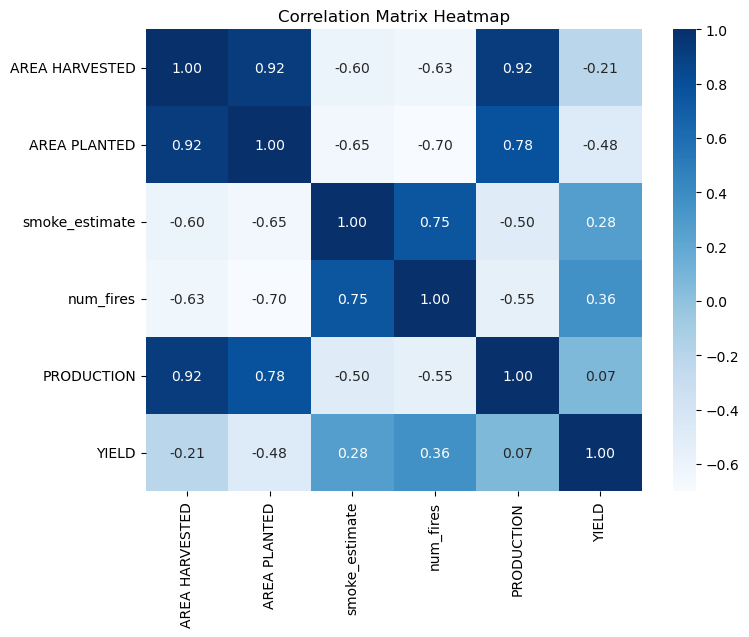

In [34]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

### Result - Correlation Table Analysis:

1. **Positive Relationships:**
   - 'AREA HARVESTED' and 'AREA PLANTED' display strong positive correlations, nearly perfect, indicating high consistency between harvested and planted areas.

2. **Negative Correlation:**
   - 'smoke_estimate' shows a moderate negative correlation with 'AREA HARVESTED' and 'AREA PLANTED', suggesting a potential inverse relationship—higher smoke estimates aligning with smaller harvested or planted areas.

3. **Moderate Positive Relationships:**
   - 'num_fires' demonstrates moderate positive correlations with 'smoke_estimate' and 'AREA HARVESTED', indicating a potential connection between the number of fires and smoke estimates or harvested areas.

4. **Robust Positive Correlation:**
   - 'PRODUCTION' exhibits a strong positive correlation with both 'AREA HARVESTED' and 'AREA PLANTED', implying a significant association between production yield and the utilized harvesting or planting areas.

5. **Weak Correlation:**
   - 'YIELD' showcases weaker correlations with other attributes, indicating a relatively independent behavior concerning the rest of the variables in this analysis.

# Step 5 - Run Linear Regression

### Summary of Statistical Analysis:

The code conducts a thorough statistical analysis utilizing linear regression and correlation techniques. It defines independent ('AREA HARVESTED', 'AREA PLANTED', 'smoke_estimate', 'num_fires') and dependent ('YIELD') variables, creates a linear regression model, and assesses its significance. The analysis involves examining coefficients, intercepts, Spearman's rank correlation, and overall model significance. This comprehensive evaluation aids in understanding relationships between attributes and their statistical relevance.

### Flow Explanation of Statistical Analysis:

1. **Variable Definition:**
   - Identification of independent (`X`: 'AREA HARVESTED', 'AREA PLANTED', 'smoke_estimate', 'num_fires') and dependent (`y`: 'YIELD') variables.
   - I am not considering PRODUCTION as an independent variable because YIELD is calculated as PRODUCTION/AREA HARVESTED. This would be redundant information.

2. **Model Creation:**
   - Formation of a linear regression model (`model = LinearRegression()`) using scikit-learn.

3. **Model Fitting:**
   - Incorporation of independent and dependent variables into the model (`model.fit(X, y)`) to establish their relationship.

4. **Coefficient and Intercept Analysis:**
   - Extraction and display of coefficients and intercept values (`model.coef_`, `model.intercept_`) that define the relationship between variables.

5. **Correlation Computation:**
   - Calculation of Spearman's rank correlation coefficient (`spearman_corr`) between 'smoke_estimate' and 'PRODUCTION' attributes, indicating the strength and direction of their relationship.

6. **Regression Analysis:**
   - Execution of Ordinary Least Squares (OLS) regression (`sm.OLS(y, X).fit()`) to assess the statistical significance, obtaining a detailed summary (`model.summary()`) containing coefficients, significance levels, and model fitness indicators.
   
7. **Model Significance:**
   - Acquisition of the p-value (`model.f_pvalue`) to gauge the overall significance of the linear regression model.

8. **Data Export:**
   - Preservation of the analyzed data, including relationships and variables, in a CSV file named 'multivariate_data.csv' (`final_df.to_csv()`).

In [35]:
# Define independent and dependent variables
X = final_df[['AREA HARVESTED', 'AREA PLANTED', 'smoke_estimate', 'num_fires']]
y = final_df['YIELD']

In [36]:
# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

LinearRegression()

In [37]:
# Print coefficients and intercept
print("Coefficients:", model.coef_)  # Display coefficients
print("Intercept:", model.intercept_)  # Display intercept

Coefficients: [ 0.0013103  -0.00173482 -0.50182623  0.00083109]
Intercept: 76.74615914843113


In [38]:
# Calculate Spearman's rank correlation coefficient in Python (using Pandas)
spearman_corr = final_df['smoke_estimate'].corr(final_df['PRODUCTION'], method='spearman')
spearman_corr  # Display Spearman's correlation coefficient

-0.453507016970999

In [39]:
# Another Regression Analysis Using Statsmodels
y = final_df['YIELD']
X = final_df[['AREA HARVESTED', 'AREA PLANTED', 'smoke_estimate', 'num_fires']]

# Assuming 'X' contains your independent variables and 'y' is the dependent variable
model = sm.OLS(y, X).fit()  # Fit an OLS model

In [40]:
print(model.summary())  # Display the summary of the OLS regression results

                                 OLS Regression Results                                
Dep. Variable:                  YIELD   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              173.0
Date:                Thu, 14 Dec 2023   Prob (F-statistic):                    4.21e-30
Time:                        01:58:19   Log-Likelihood:                         -228.44
No. Observations:                  58   AIC:                                      464.9
Df Residuals:                      54   BIC:                                      473.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [41]:
print(model.f_pvalue)  # Display the p-value for model significance

4.213813909798127e-30


In [42]:
# Save the modified DataFrame to a CSV file for further analysis
final_df.to_csv(r"C:\Users\shwet\Documents\local-wildfire-project\Data512-WildFire-Project\02_data\02_intermediate_data\multivariate_data.csv", index=False)

### Results Interpretation of Model Summary:

The `model.summary()` function in Statsmodels provides a detailed breakdown of the regression analysis:

- **Dependent Variable (YIELD):** Variable being predicted by the model.
- **Model Fit Metrics:**
  - **R-squared:** Measures the explained variance in the dependent variable by the independent variables. Higher values (close to 1) denote better fit.
  - **Adj. R-squared:** Adjusts R-squared for the number of predictors, penalizing irrelevant predictors.
- **Coefficients Table:**
  - **Coefficients:** Estimated effects of each independent variable on the dependent variable.
  - **Standard Error:** Variability in the coefficient estimates.
  - **t-value:** Significance of the coefficient estimate.
  - **P>|t| (p-value):** Probability of observing the t-value if the predictor has no effect. Values <0.05 indicate statistical significance.
- **F-statistic and p-value:** Test for overall model significance. A low p-value indicates the model is statistically significant.

### Explanation of `model.f_pvalue`:
- **F-statistic p-value:** Indicates the overall significance of the regression model.
- **Interpretation:** A small p-value (<0.05) suggests the model is useful in predicting the dependent variable, signifying at least one significant predictor variable.

# Conclusion

From the results of the Correlation study and the linear regression model, we can say that there exists a relationship between yield and wildfire.

1. A negative correlation between yield and the wildfire impact (smoke estimate and number of wildfires) shows that with increase in the wildfire which in turn is shown as increase in smoke estimate and/or increase in the number of fires, there is a reduction in yield.

2. The statistical significance of the relationship is shown when we regress yield which is a dependent variable, against the wildfire impact (smoke estimate and number of wildfires), the p value of the smoke estimate shows that it is significant and we can reject the null hypothesis. (As p-value - 0.00 is lower than the level of significance - 0.05 we can reject the null hypothesis.)

Now that the relationship has been proven and quantified with statistical backing, we will now predict how yield will change with time to propose recommendations to the city council to take steps to mitigate the effect of the wildfire on yield.